# Coinmarketcap Scraper 

Cryptocurrency price varies from markets to markets. When a customer have the need of purchasing, 

First scrape the list of all crypto currencies.

Then based on the choice, scrape the market information

In [30]:
import requests
from bs4 import BeautifulSoup
import os
import csv
import sys
import re

def downloadMarketInfo(stats_file_path):
    exist = os.path.exists(stats_file_path)
    if not exist:
        os.makedirs(stats_file_path)
    page = requests.get("https://coinmarketcap.com/")
    soup = BeautifulSoup(page.content, 'html.parser')
    header = []
    body = []
    for string in soup.thead.strings:
        if string != '\n':
            header.append(string)
    header.insert(1, 'abbr')
    header.insert(7, 'abbr')
    for string in soup.tbody.strings:
        if string != '\n':
            temp = string.replace('\n', '')
            if '*' in temp:
                continue
            body.append(temp)
    
    lines = []
    imgtag = soup.tbody.findAll('img')
    f = 0
    for anchor in imgtag:
        if f == 1:
            lines.append(anchor['src'])
            f = 0
        else:
            f=1 
    rows = []
    i = 9
    k = 0
    rows.append(header)
    while i < len(body):
        sublist = body[i-9:i]
        sublist.append('<img class = \"line\" src=\"' +lines[k] + '\">')
        rows.append(sublist)
        i += 9
        k += 1
    with open(stats_file_path + 'Market.csv', 'w',newline='') as myFile:
        writer = csv.writer(myFile, dialect= 'excel')
        #print(rows)
        writer.writerows(rows)


def downloadBTCInfo(name, stats_file_path):
    exist = os.path.exists(stats_file_path)
    if not exist:
        os.makedirs(stats_file_path)
    page = requests.get("https://coinmarketcap.com/currencies/"+ name +"/#markets")
    soup = BeautifulSoup(page.content, 'html.parser')
    header = []
    body = []
    if soup.thead is None:
        return
    for string in soup.thead.strings:
        if string != '\n':
            header.append(string)
    for string in soup.tbody.strings:
        if string != '\n':
            temp = string.replace('\n', '')
            if '*' in temp:
                continue
            body.append(temp)
    header.insert(6, '%')
    rows = []
    rows.append(header)
    i = 8
    while i < len(body):
        rows.append(body[i - 8:i])
        i += 8
    with open(stats_file_path + name + '.csv', 'w',newline='') as myFile:
        writer = csv.writer(myFile, dialect='excel')
        writer.writerows(rows)

downloadMarketInfo("downloads/")
downloadBTCInfo("Bitcoin", "downloads/")
downloadBTCInfo("xxx", "downloads/")

 Based on market information, read from CSV and give out analysis:
 1. what's current status of the cryptocurrencies?
 2. what would be the best market to purchase from currently?

,#,abbr,Name,Market Cap,Price,Volume (24h),Circulating Supply,abbr.1,Change (24h),Price Graph (7d),capint
0,1,BTC,Bitcoin,"$195,332,333,959",$11557.40,"$6,148,100,000","16,901,062",BTC,3.13%,,1.95332e+11
1,2,ETH,Ethereum,"$85,072,043,824",$868.14,"$1,723,480,000","97,993,687",ETH,2.73%,,8.5072e+10
2,3,XRP,Ripple,"$41,552,795,381",$1.06,"$1,268,880,000","39,091,956,706",XRP,17.75%,,4.15528e+10
3,4,BCH,Bitcoin Cash,"$21,811,712,056",$1282.99,"$359,842,000","17,000,688",BCH,3.76%,,2.18117e+10
4,5,LTC,Litecoin,"$11,742,214,279",$211.62,"$548,508,000","55,487,262",LTC,2.22%,,1.17422e+10
5,6,NEO,NEO,"$7,652,645,000",$117.73,"$177,964,000","65,000,000",NEO,-0.32%,,7.65264e+09
6,7,ADA,Cardano,"$7,620,640,135",$0.293926,"$101,809,000","25,927,070,538",ADA,1.83%,,7.62064e+09
7,8,XLM,Stellar,"$7,021,837,222",$0.380214,"$79,625,800","18,468,118,539",XLM,6.21%,,7.02184e+09
8,9,XMR,Monero,"$5,886,706,130",$372.82,"$124,760,000","15,789,843",XMR,8.74%,,5.88671e+09
9,10,EOS,EOS,"$5,804,070,248",$8.19,"$212,978,000","708,630,963",EOS,4.26%,,5.80407e+09


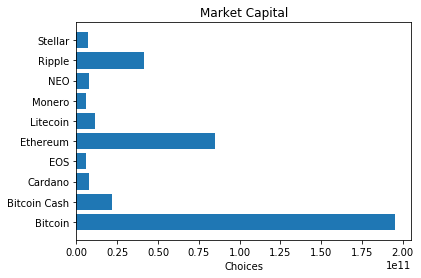

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy

def marketcap(pdmkt):
    pd.set_option('display.max_colwidth', -1)
    reviews = pd.read_csv(pdmkt)
    df1 = reviews.head(10).copy()
    df1['capint'] = df1['Market Cap'].str.replace(',', '')
    df1['capint'] = df1['capint'].str.replace('$', '')
    df1['capint'] = df1['capint'].astype(float)
    fig, ax = plt.subplots()
    q1 = ax.barh(df1['Name'], df1['capint'])
    ax.set_title('Market Capital')
    ax.set_xlabel('Choices')
    display((df1.reset_index(drop=True)).style)
    plt.show()

marketcap("downloads/Market.csv")


In [ ]:
In the above form and chart the market information is shown.

By choosing the name of the cryptocurrency, The user could check the detail of the specific cryptocurrency.

    #    Source      Pair  Volume (24h)       Price  Volume (%)   %   Updated
0   1      OKEx  BTC/USDT  $518,969,000   $11147.60        9.20   %  Recently
1   2  Bitfinex   BTC/USD  $273,879,000   $11113.00        4.86   %  Recently
2   3      OKEx   ETH/BTC  $192,413,000   $11109.90        3.41   %  Recently
3   4   Binance  BTC/USDT  $185,381,000   $11165.10        3.29   %  Recently
4   5     Upbit   BTC/KRW  $168,127,000   $11358.80        2.98   %  Recently
5   6     Huobi  BTC/USDT  $164,245,000   $11158.90        2.91  %   Recently
6   7   Bithumb   BTC/KRW  $163,504,000   $11351.40        2.90   %  Recently
7   8      OKEx   LTC/BTC  $144,830,000   $11132.40        2.57   %  Recently
8   9  bitFlyer   BTC/JPY  $142,248,000  $11120.30         2.52   %  Recently
9  10      BTCC   BTC/USD  $122,988,000   $11090.00        2.18   %  Recently


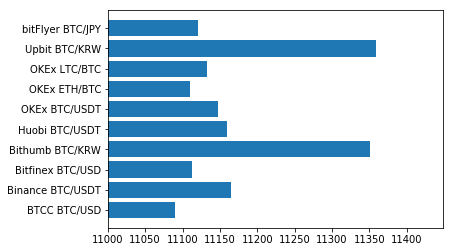

In [61]:
def marketchart(name):
    reviews = pd.read_csv('downloads/'+ name + '.csv')
    reviews.head(10)
    df1 = reviews.head(10).copy()
    print(df1)
    df1['pint'] = df1['Price'].str.replace(',', '')
    df1['pint'] = df1['pint'].str.replace('$', '')
    df1['pint'] = df1['pint'].astype(float)
    plt.barh(df1['Source'] +' '+  df1['Pair'], df1['pint'])
    min = df1['pint'].min()
    max = df1['pint'].max()
    range = max - min
    plt.xlim(min - range/3, max + range/3)
    plt.show()

marketchart('Bitcoin')